# Example usage of the `lcmodel` Python module

In this example we are calculating landscape metrics for forest cover changes on a yearly base, with the classes in the example raster file representing the year of change from 2001 - 2017.

In [1]:
# Import base libraries
from lcmodel import LC_Initialize, compute_simple_statistics, listStatistics, list_simple_metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

load and initialise a GDAL compatible raster, e.g. a GeoTIFF

(-42676.73376130848, 27.95170623117008, 0.0, 9179493.087520272, 0.0, -27.95170623117011)
27.95170623117008
27.95170623117011
-128.0
Warning, pixelSizeX 27.95170623117008 and pixelSizeY not complete square
nodata value: -128.0
we will work with  17 classes, which are: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
raster cellsize is: 27.95170623117008


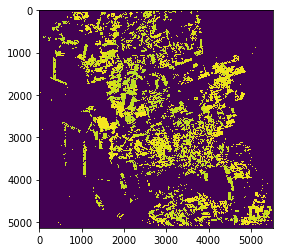

In [2]:
rasterpath = "extract_utm.tif"

lc_calc = LC_Initialize(rasterpath)

print("nodata value: {}".format(lc_calc.nodata))

print("we will work with  {} classes, which are: {}".format(len(lc_calc.classes), lc_calc.classes))

print("raster cellsize is: {}".format(lc_calc.cellsize))

# Plot array
plt.imshow(lc_calc.array, cmap="viridis", interpolation='nearest')

There are two metric types in the package, summary land metrics, which do not count cells on different land classes, but over all cells for landcover summary.

In [3]:
summaryLandMetrics = list_simple_metrics()
print("summary Land Metrics")
print(summaryLandMetrics)

summary Land Metrics
['LC_Mean', 'LC_Min', 'LC_Sum', 'LC_Max', 'LC_SD', 'LC_LQua', 'LC_Med', 'LC_UQua', 'DIV_SH', 'DIV_EV', 'DIV_SI']


In [4]:
# overall land metrics descriptive statistics

land_metrics = [  "LC_Mean",
                    "LC_Min",
                    "LC_Sum",
                    "LC_Max",
                    "LC_SD",
                    "LC_LQua",
                    "LC_Med",
                    "LC_UQua" ]

for smt in land_metrics:
    print(lc_calc.execLandMetric(smt,lc_calc.nodata))


('LC_Mean', 8.764414475761548)
('LC_Min', 1)
('LC_Sum', 49102115.0)
('LC_Max', 17)
('LC_SD', 5.007691487849079)
('LC_LQua', 4.0)
('LC_Med', 8.0)
('LC_UQua', 14.0)


Landscape Diversity metrics such as DIV_SH (shannon), DIV_EV (eveness) or DIV_SI (simpson) need at least two landcover classes to calculate landscape diversity and take much longer time!

In [5]:
smp = compute_simple_statistics(lc_calc)
smp.to_csv('simple_metrics.csv', sep=';')

display(type(smp))
display(smp)

('LC_Mean', 8.764414475761548)
('LC_Min', 1)
('LC_Sum', 49102115.0)
('LC_Max', 17)
('LC_SD', 5.007691487849079)
('LC_LQua', 4.0)
('LC_Med', 8.0)
('LC_UQua', 14.0)
('DIV_SH', 2.7483710664495593)
('DIV_EV', 0.9700543985560963)
('DIV_SI', 0.9300684425715466)


pandas.core.frame.DataFrame

,value
LC_Mean,8.764414e+00
LC_Min,1.000000e+00
LC_Sum,4.910212e+07
LC_Max,1.700000e+01
LC_SD,5.007691e+00
LC_LQua,4.000000e+00
LC_Med,8.000000e+00
LC_UQua,1.400000e+01
DIV_SH,2.748371e+00
DIV_EV,9.700544e-01


The "single class land metrics" calculate various metrics and statictics on a land use/land cover class. Therefore, the raster needs to have the the cells classified appropriately. Due to the relabelling and binary classification scheme of the library you should have at least 4 times the memory of the uncompressed raster size available as RAM memory. Several metrics require exponentially more time and memory. In particular metrics like `Euclidean Nearest-Neighbor Distance` easily blow up your computer :-)

In [6]:
singleClassLandMetrics = listStatistics()
print("single Class Land Metrics")
print(singleClassLandMetrics)

single Class Land Metrics
['Land cover', 'Landscape Proportion', 'Edge length', 'Edge density', 'Number of Patches', 'Patch density', 'Greatest patch area', 'Smallest patch area', 'Mean patch area', 'Median patch area', 'Largest Patch Index', 'Euclidean Nearest-Neighbor Distance', 'Fractal Dimension Index', 'Mean patch shape ratio', 'Overall Core area', 'Like adjacencies', 'Patch cohesion index', 'Landscape division', 'Effective Meshsize', 'Splitting Index']


Here we are now calculating 6 well-known metrics for each class (here representing forest cover changes on a yearly base, hence the classes roughly representing the last 2 decades). As the original raster has all 17 classes (year of loss  pixels) the tool has to relabel the analytical matrix for each year/class.

In [8]:


desired_metrics = ['Land cover',
    'Edge length',
    'Edge density',
    'Number of Patches',
    'Median patch area',
    'Mean patch perimeter']

# 'Euclidean Nearest-Neighbor Distance'


# 'Like adjacencies'
print(desired_metrics)

# initialise empty dict
results_dict = {}
results_dict['class'] = []

for smt in desired_metrics:
    results_dict[smt] = []

for cli in lc_calc.classes:
    print("doing stuff for lc class {}".format(cli))
    # need to initialise cl_array and labelled_array for current class
    print("initialising labelled array and fcc ...")
    lc_calc.create_cl_array_for_class(cli)
    lc_calc.f_ccl(lc_calc.cl_array)

    results_dict['class'].append(cli)
    
    for smt in desired_metrics:
        print("next metric is {}".format(smt))
        met_tup = lc_calc.execSingleMetric(smt, cli)
        print(met_tup)
        results_dict[smt].append(met_tup[1])
        print("finished this metric calculation.")

# df = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=results_dict)
#df.to_csv('lc-stats.csv', sep=';')
display(df.head(5))

['Land cover', 'Edge length', 'Edge density', 'Number of Patches', 'Median patch area', 'Mean patch perimeter']
doing stuff for lc class 1
initialising labelled array and fcc ...
next metric is Land cover
('Land cover', 200719332.17832628)
finished this metric calculation.
next metric is Edge length
('Edge length', 3741112.2653922657)
finished this metric calculation.
next metric is Edge density
('Edge density', 0.0008546864184056776)
finished this metric calculation.
next metric is Number of Patches
('Number of Patches', 6558)
finished this metric calculation.
next metric is Median patch area
('Median patch area', 1562.5957624672644)
finished this metric calculation.
next metric is Mean patch perimeter
('Mean patch perimeter', 0.13149373764770578)
finished this metric calculation.
doing stuff for lc class 2
initialising labelled array and fcc ...
next metric is Land cover
('Land cover', 254553100.08896723)
finished this metric calculation.
next metric is Edge length
('Edge length', 40

('Land cover', 188506083.69888213)
finished this metric calculation.
next metric is Edge length
('Edge length', 4217353.436158941)
finished this metric calculation.
next metric is Edge density
('Edge density', 0.0009634874464596213)
finished this metric calculation.
next metric is Number of Patches
('Number of Patches', 7262)
finished this metric calculation.
next metric is Median patch area
('Median patch area', 1562.5957624672644)
finished this metric calculation.
next metric is Mean patch perimeter
('Mean patch perimeter', 0.1482328018496434)
finished this metric calculation.
doing stuff for lc class 14
initialising labelled array and fcc ...
next metric is Land cover
('Land cover', 422372759.7864265)
finished this metric calculation.
next metric is Edge length
('Edge length', 9443931.17750051)
finished this metric calculation.
next metric is Edge density
('Edge density', 0.0021575400953441574)
finished this metric calculation.
next metric is Number of Patches
('Number of Patches', 

,class,Land cover,Edge length,Edge density,Number of Patches,Median patch area,Mean patch perimeter
0,1,2.007193e+08,3.741112e+06,0.000855,6558,1562.595762,0.131494
1,2,2.545531e+08,4.087098e+06,0.000934,4769,2343.893644,0.143655
2,3,2.642021e+08,4.431855e+06,0.001012,5236,2343.893644,0.155772
3,4,5.979171e+08,8.133108e+06,0.001858,8728,1562.595762,0.285865
4,5,2.361551e+08,3.933867e+06,0.000899,5231,2343.893644,0.138269
